<a href="https://colab.research.google.com/github/Devikrishna545/Sentimental-Analysis/blob/main/Sentimental_Analysis_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import userdata
from huggingface_hub import login

HF_TOKEN = userdata.get('secret_token_hugface')
if HF_TOKEN:
    login(HF_TOKEN)
    print("Successfully logged in to Hugging Face!")
else:
    print("Token is not set. Please add it to Secrets.")

Successfully logged in to Hugging Face!


In [2]:
import pandas as pd

splits = {'train': 'train_df.csv', 'validation': 'val_df.csv', 'test': 'test_df.csv'}
df = pd.read_csv("hf://datasets/Sp1786/multiclass-sentiment-analysis-dataset/" + splits["train"])

/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


In [3]:
df

,id,text,label,sentiment
0,9536,"Cooking microwave pizzas, yummy",2,positive
1,6135,Any plans of allowing sub tasks to show up in ...,1,neutral
2,17697,"I love the humor, I just reworded it. Like sa...",2,positive
3,14182,naw idk what ur talkin about,1,neutral
4,17840,That sucks to hear. I hate days like that,0,negative
...,...,...,...,...
31227,6265,Grrrr....I got the wrong size coat for the sheep,0,negative
31228,11284,4 cases of swine flu!,1,neutral
31229,6436,excellent,2,positive
31230,860,is sitting thru the boring bits in Titanic wai...,1,neutral


In [4]:
df.head(n=5)

,id,text,label,sentiment
0,9536,"Cooking microwave pizzas, yummy",2,positive
1,6135,Any plans of allowing sub tasks to show up in ...,1,neutral
2,17697,"I love the humor, I just reworded it. Like sa...",2,positive
3,14182,naw idk what ur talkin about,1,neutral
4,17840,That sucks to hear. I hate days like that,0,negative


In [5]:
df.tail(n=3)

,id,text,label,sentiment
31229,6436,excellent,2,positive
31230,860,is sitting thru the boring bits in Titanic wai...,1,neutral
31231,15795,Missed the play,0,negative


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31232 entries, 0 to 31231
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   id         31232 non-null  int64 
 1   text       31232 non-null  object
 2   label      31232 non-null  int64 
 3   sentiment  31232 non-null  object
dtypes: int64(2), object(2)
memory usage: 976.1+ KB


In [7]:
df.describe()

,id,label
count,31232.000000,31232.000000
mean,10576.775359,1.043961
std,8010.753795,0.790636
min,0.000000,0.000000
25%,3476.000000,0.000000
50%,8662.000000,1.000000
75%,17071.500000,2.000000
max,27480.000000,2.000000


In [8]:
#remove the null and suplicates in the data
df.dropna(inplace=True)
df.drop_duplicates(inplace=True)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31232 entries, 0 to 31231
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   id         31232 non-null  int64 
 1   text       31232 non-null  object
 2   label      31232 non-null  int64 
 3   sentiment  31232 non-null  object
dtypes: int64(2), object(2)
memory usage: 976.1+ KB


In [10]:
#remove the colum id as its not relevant
df.drop(columns=['id'], inplace=True)

In [11]:
#labels can be taken as columns to improve features  by encoding
df['label'].value_counts()


,count
label,
1,11649
2,10478
0,9105


In [12]:
#one hot encoding should be done to improve features
df = pd.get_dummies(df, columns=['label'],prefix='label')
df


,text,sentiment,label_0,label_1,label_2
0,"Cooking microwave pizzas, yummy",positive,False,False,True
1,Any plans of allowing sub tasks to show up in ...,neutral,False,True,False
2,"I love the humor, I just reworded it. Like sa...",positive,False,False,True
3,naw idk what ur talkin about,neutral,False,True,False
4,That sucks to hear. I hate days like that,negative,True,False,False
...,...,...,...,...,...
31227,Grrrr....I got the wrong size coat for the sheep,negative,True,False,False
31228,4 cases of swine flu!,neutral,False,True,False
31229,excellent,positive,False,False,True
31230,is sitting thru the boring bits in Titanic wai...,neutral,False,True,False


In [13]:
# check text length and add as a column for the data
df['text_length'] = df['text'].apply(len)
df

,text,sentiment,label_0,label_1,label_2,text_length
0,"Cooking microwave pizzas, yummy",positive,False,False,True,31
1,Any plans of allowing sub tasks to show up in ...,neutral,False,True,False,57
2,"I love the humor, I just reworded it. Like sa...",positive,False,False,True,128
3,naw idk what ur talkin about,neutral,False,True,False,29
4,That sucks to hear. I hate days like that,negative,True,False,False,42
...,...,...,...,...,...,...
31227,Grrrr....I got the wrong size coat for the sheep,negative,True,False,False,48
31228,4 cases of swine flu!,neutral,False,True,False,21
31229,excellent,positive,False,False,True,9
31230,is sitting thru the boring bits in Titanic wai...,neutral,False,True,False,95


In [14]:
#check for the word count  for every text and add as a column
df['word_count'] = df['text'].apply(lambda x: len(x.split()))
df


,text,sentiment,label_0,label_1,label_2,text_length,word_count
0,"Cooking microwave pizzas, yummy",positive,False,False,True,31,4
1,Any plans of allowing sub tasks to show up in ...,neutral,False,True,False,57,12
2,"I love the humor, I just reworded it. Like sa...",positive,False,False,True,128,22
3,naw idk what ur talkin about,neutral,False,True,False,29,6
4,That sucks to hear. I hate days like that,negative,True,False,False,42,9
...,...,...,...,...,...,...,...
31227,Grrrr....I got the wrong size coat for the sheep,negative,True,False,False,48,9
31228,4 cases of swine flu!,neutral,False,True,False,21,5
31229,excellent,positive,False,False,True,9,1
31230,is sitting thru the boring bits in Titanic wai...,neutral,False,True,False,95,19


In [15]:
#create a method to check the regex count or use counter library
import re
from collections import Counter

def count_symbols(text):
  pattern = r'[^\w\s]'
  matches = re.findall(pattern, text)  # list of all regex matches
  #counts = Counter(matches)  # count each matched pattern occurrence
  return len(matches) # Return the total count of symbols

In [16]:
df['symbol_count'] = df['text'].apply(count_symbols)

In [17]:
df

,text,sentiment,label_0,label_1,label_2,text_length,word_count,symbol_count
0,"Cooking microwave pizzas, yummy",positive,False,False,True,31,4,1
1,Any plans of allowing sub tasks to show up in ...,neutral,False,True,False,57,12,1
2,"I love the humor, I just reworded it. Like sa...",positive,False,False,True,128,22,9
3,naw idk what ur talkin about,neutral,False,True,False,29,6,0
4,That sucks to hear. I hate days like that,negative,True,False,False,42,9,1
...,...,...,...,...,...,...,...,...
31227,Grrrr....I got the wrong size coat for the sheep,negative,True,False,False,48,9,4
31228,4 cases of swine flu!,neutral,False,True,False,21,5,1
31229,excellent,positive,False,False,True,9,1,0
31230,is sitting thru the boring bits in Titanic wai...,neutral,False,True,False,95,19,0


In [18]:
#replace column header label_2 as label_positive
df.rename(columns={'label_0': 'label_negative'}, inplace=True)
df.rename(columns={'label_1': 'label_neutral'}, inplace=True)
df.rename(columns={'label_2': 'label_positive'}, inplace=True)
df

,text,sentiment,label_negative,label_neutral,label_positive,text_length,word_count,symbol_count
0,"Cooking microwave pizzas, yummy",positive,False,False,True,31,4,1
1,Any plans of allowing sub tasks to show up in ...,neutral,False,True,False,57,12,1
2,"I love the humor, I just reworded it. Like sa...",positive,False,False,True,128,22,9
3,naw idk what ur talkin about,neutral,False,True,False,29,6,0
4,That sucks to hear. I hate days like that,negative,True,False,False,42,9,1
...,...,...,...,...,...,...,...,...
31227,Grrrr....I got the wrong size coat for the sheep,negative,True,False,False,48,9,4
31228,4 cases of swine flu!,neutral,False,True,False,21,5,1
31229,excellent,positive,False,False,True,9,1,0
31230,is sitting thru the boring bits in Titanic wai...,neutral,False,True,False,95,19,0


<module 'matplotlib.pyplot' from '/usr/local/lib/python3.12/dist-packages/matplotlib/pyplot.py'>

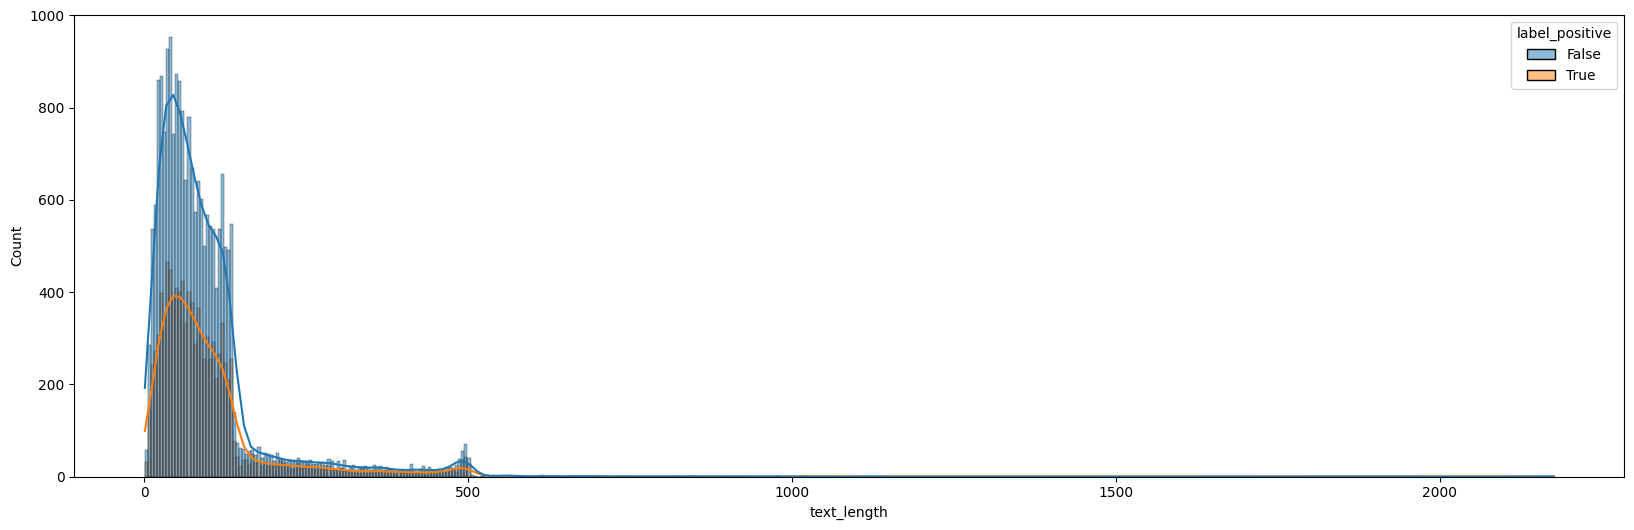

In [19]:
#visual analysis of the dataframe
import matplotlib.pyplot as plt
import seaborn as sns

#plot histograms for text_lengths vs sentiment
plt.figure(figsize=(20, 6))
sns.histplot(data=df, x='text_length', hue='label_positive', kde=True)
plt


<module 'matplotlib.pyplot' from '/usr/local/lib/python3.12/dist-packages/matplotlib/pyplot.py'>

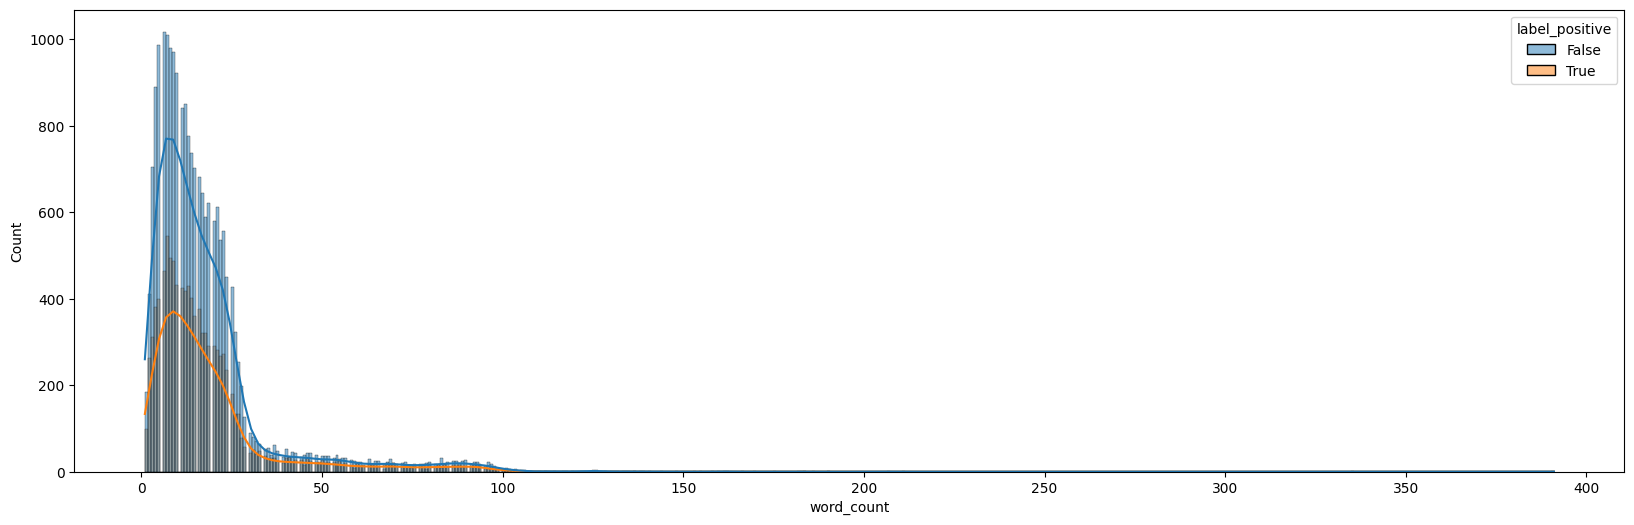

In [20]:
#plot histograms for word_counts vs sentiment
plt.figure(figsize=(20, 6))
sns.histplot(data=df, x='word_count', hue='label_positive', kde=True)
plt

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.12/dist-packages/matplotlib/pyplot.py'>

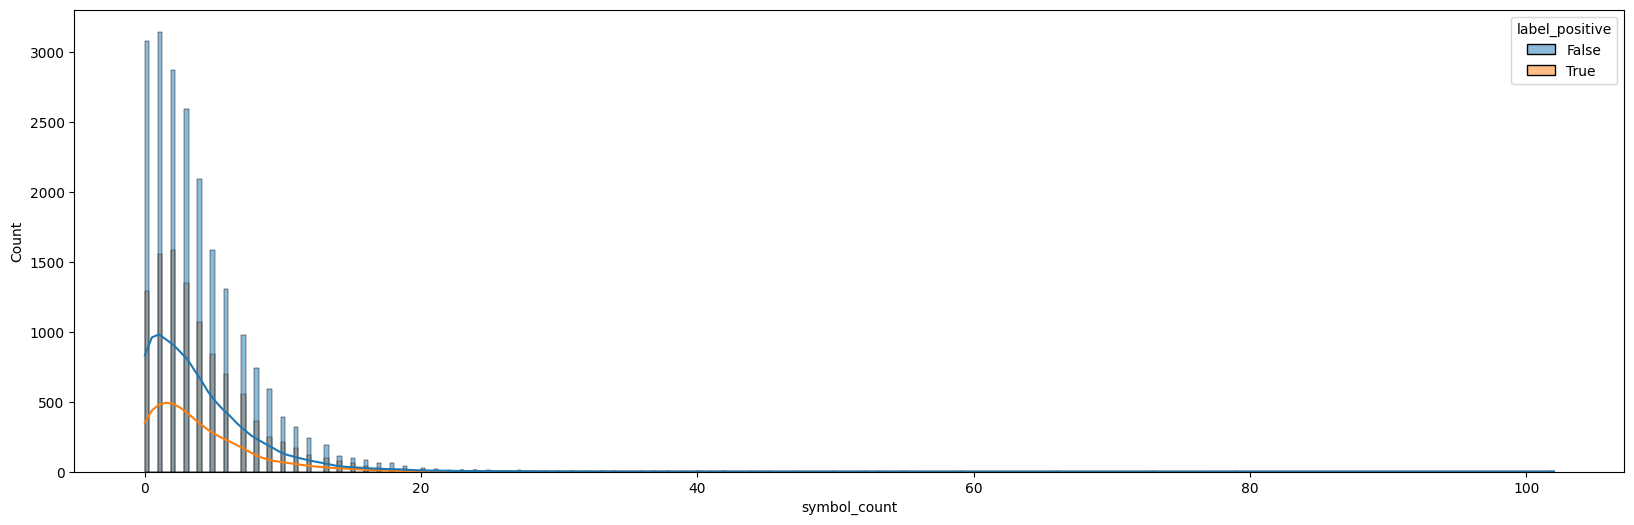

In [21]:

#plot histograms for text_lengths vs sentiment
plt.figure(figsize=(20, 6))
sns.histplot(data=df, x='symbol_count', hue='label_positive', kde=True)
plt

In [22]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [23]:
#tokenize words by removing common stop words
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

# Download resources (will only download if not already present)
nltk.download('stopwords')
nltk.download('punkt')

stop_words = set(stopwords.words('english'))

def remove_stopwords(text):
    # Ensure the input is a string before tokenizing
    if not isinstance(text, str):
        return ''
    words = word_tokenize(text)
    filtered_words = [word for word in words if word.lower() not in stop_words]
    return ' '.join(filtered_words)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [24]:
df['text'] = df['text'].apply(remove_stopwords)

LookupError: 
**********************************************************************
  Resource [93mpunkt_tab[0m not found.
  Please use the NLTK Downloader to obtain the resource:

  [31m>>> import nltk
  >>> nltk.download('punkt_tab')
  [0m
  For more information see: https://www.nltk.org/data.html

  Attempted to load [93mtokenizers/punkt_tab/english/[0m

  Searched in:
    - '/root/nltk_data'
    - '/usr/nltk_data'
    - '/usr/share/nltk_data'
    - '/usr/lib/nltk_data'
    - '/usr/share/nltk_data'
    - '/usr/local/share/nltk_data'
    - '/usr/lib/nltk_data'
    - '/usr/local/lib/nltk_data'
**********************************************************************


In [ ]:
import nltk
try:
    nltk.data.find('tokenizers/punkt')
    print("Punkt tokenizer data is already downloaded.")
except nltk.downloader.DownloadError:
    print("Downloading Punkt tokenizer data...")
    nltk.download('punkt')
    print("Punkt tokenizer data download complete.")
except LookupError:
    print("Punkt tokenizer data not found. Downloading...")
    nltk.download('punkt')
    print("Punkt tokenizer data download complete.")

In [ ]:
#vectorize the text in the df


In [ ]:
# Now I have transformed the data of Xtrain

**Transform the test data**

In [ ]:
#I have to transform the xtest
df_test = pd.read_csv("hf://datasets/Sp1786/multiclass-sentiment-analysis-dataset/" + splits["test"])

In [ ]:
df_test

In [ ]:
df_test = pd.get_dummies(df_test, columns=['label'],prefix='label')
df_test

In [ ]:
# Drop the 'id' column
#df_test.drop(columns=['id'], inplace=True)

# drop the rows that are duplicate and null values for texts
df_test.dropna(inplace=True)
df_test.drop_duplicates(inplace=True)

# Calculate text length, word count, and symbol count
df_test['text_length'] = df_test['text'].apply(len)
df_test['word_count'] = df_test['text'].apply(lambda x: len(x.split()))
df_test['symbol_count'] = df_test['text'].apply(count_symbols)

# Rename the label columns to match the training data
df_test.rename(columns={'label_0': 'label_negative', 'label_1': 'label_neutral', 'label_2': 'label_positive'}, inplace=True)

In [ ]:
df_test